# 1. 感知机(Perceptron)

感知机是由美国学者Frank Rosenblatt 在1957 年提出来的。感知机是作为神经网络（深度学习）的起源的算法，学习感知机的构造也是学习通向神经网络和深度学习的一种重要思想。

感知机接收多个输入信号，输出一个信号信号。感知机的输出信号只有 **激活/抑制** 或 **未激活** 两种状态，使用1代表激活，0代表未激活。下图是一个接收两个输入信号的感知机的例子。x1、x2 是输入信号，y 是输出信号，w1、w2 是权重。

![9.perceptron.png](image/9.perceptron.png)

图中的 ○ 称为“神经元”或者“节点”。输入信号被送往神经元时，会被分别乘以固定的权重（$w_1 x_1$、$w_2 x_2$）。神经元会计算传送过来的信号的总和，只有当这个总和超过了某个界限值时，才会输出1。这也称为“神经元被激活” 。这里将这个界限值称为阈值，用符号 θ 表示。

$$y=
\begin{cases}
0&w_1 x_1 + w_2 x2 <= \theta \\
1&w_1 x_1 + w_2 x2 > \theta
\end{cases}$$

如果将阈值 θ 改记为 -b，我们将 b 称为偏置(bias)，则

$$y=
\begin{cases}
0&w_1 x_1 + w_2 x2 + b <= 0 \\
1&w_1 x_1 + w_2 x2 + b > 0
\end{cases}$$

## 1.1 实现逻辑运算

现在让我们考虑用感知机来解决简单的逻辑电路问题。这里首先以逻辑电路为题材来思考一下**与门**（AND gate）。与门是有两个输入和一个输出的门电路。

|输入x1|输入x2|输出y|
|--|--|-|
| 0| 0|0|
| 1| 0|0|
| 0| 1|0|
| 0| 0|1|

与门仅在两个输入均为 1 时输出 1，其他时候则输出 0。

我们使用 Python 和 Numpy 实现一个 AND() 函数，这个函数接受两个参数 x1 和 x2，并在函数内初始化参数 w1、w2 和 b：

In [23]:
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b           # np.sum(w*x)计算相乘后的各个元素的总和
    if tmp <= 0:
        return 0
    else:
        return 1

In [24]:
print(AND(0, 0)) # 输出0
print(AND(1, 0)) # 输出0
print(AND(0, 1)) # 输出0
print(AND(1, 1)) # 输出1

0
0
0
1


除了“与”门，逻辑电路还有两种常用的门：**或门** (OR gate) 和**非门** (NOT gate)。其中**或门**是“只要有一个输入信号是1，输出就为1”的逻辑电路。

|输入x1|输入x2|输出y|
|--|--|-|
| 0| 0|0|
| 1| 0|1|
| 0| 1|1|
| 0| 0|1|

**非门**只有一个输入端，并且输入端和输出端的电平状态总是反相的：

|输入x|输出y|
|--|--|
| 0| 1|
| 1| 0|

我们继续使用 Python 实现或门和非门，其中在或门的实现中，仅设置权重和偏置的值这一点和与门的实现不同。

In [25]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])   # 仅权重和偏置与AND不同
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [26]:
def NOT(x):
    return 1 if x <= 0 else 0

## 1.2 感知机的局限性

现在我们来考虑一下**异或门**（XOR gate）。仅当x1 或x2 中的一方为1 时，才会输出1（“异或”是拒绝其他的意思）。

|输入x1|输入x2|输出y|
|--|--|-|
| 0| 0|0|
| 1| 0|1|
| 0| 1|1|
| 0| 0|0|

那么，要用感知机实现这个异或门的话，应该设定什么样的权重参数呢？

**实际上，用前面介绍的感知机是无法实现这个异或门的。**

只拥有一层功能神经元，其学习能力非常有限。与、或、非问题都是线性可分(linearly separable)的问题，即存在一个线性超平面能将它们分开。而异或属于非线性可分问题。

![img](image/9.linearly_separable.png)

## 1.3 多层感知机

感知机不能表示异或门让人深感遗憾，但通过叠加层来构造感知机可以解决非线性可分问题。

下面我们使用之前定义的AND函数、OR函数，可以轻松实现异或门。

In [28]:
def XOR(x1, x2):
    s1 = not AND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [29]:
print(XOR(0, 0)) # 输出0
print(XOR(1, 0)) # 输出1
print(XOR(0, 1)) # 输出1
print(XOR(1, 1)) # 输出0

0
1
1
0


与门、或门是单层感知机，而异或门是一种多层感知机（multi-layered perceptron）。

![img](image/9.multi_layer_perceptron.png)

- 第0 层的两个神经元接收输入信号，并将信号发送至第1 层的神经元。
- 第1 层的神经元将信号发送至第2 层的神经元，第2 层的神经元输出y。

# 2. 神经网络

更一般的，常见的神经网络是如下图所示的层级结构，每层神经元与下一层神经元全互连，神经元之间不存在同层连接，也不存在跨层连接。这样的网络也通常称为多层前馈神经网络(multi-layer feedforward neural network)。

![img](image/9.neural_network.png)

最左边的一列称为**输入层**，最右边的一列称为**输出层**，中间的一列称为**中间层**，也称为隐藏层。中间层和输出层神经元都是拥有激活函数的功能神经元。

## 2.1 激活函数

### 2.1.1 阶跃函数

理想中的激活函数是阶跃函数，如上一节所述它将输入值映射为输出值 0 或者 1 ，0 对应神经元抑制，1 对应神经元激活。因此阶跃函数具有不连续、不光滑等性质。可以像下面这样简单地实现阶跃函数。

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

这个实现简单、易于理解，但是参数 x 只能接受实数，但不允许参数取 NumPy 数组，例如 step_function(np.array([1.0, 2.0]))，我们将它修改为支持 NumPy 数组的实现。

In [34]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [35]:
step_function(np.array([-1.0, 1.0, 2.0]))

array([0, 1, 1])

In [37]:
import numpy as np
import matplotlib.pylab as plt

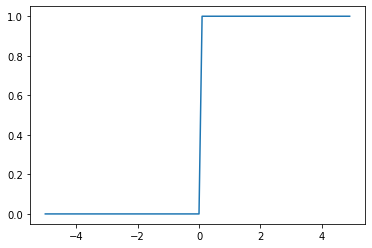

In [42]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.show()

实际常用 sigmoid 函数作为激活函数。它把可能在较大范围内变化的输入值挤压到 (0, 1) 输出范围内，因此有时也称为“挤压函数”。

In [43]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [44]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

之所以 sigmoid 函数的实现能支持 NumPy 数组，原因就在于 NumPy 的广播功能。

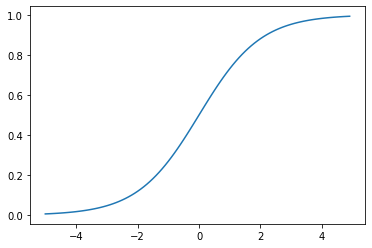

In [46]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

# 3. 反向传播算法